## Task 4

## Part 1 - Linear Regression

In [51]:
c = lambda f: 5/9*(f-32)

temps = [(f, c(f))for f in range (0,101,10)]





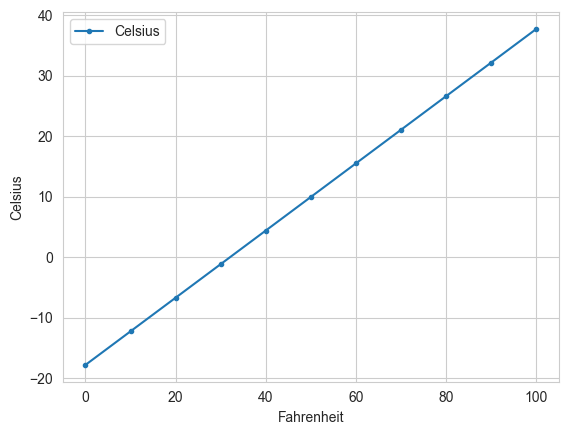

In [52]:
import pandas as pd 

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x = 'Fahrenheit', y = 'Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

 ## Load: Follow the instructions to load NY City January high temperature from a csv file into a DataFrame

In [53]:
nyc =pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## Section 2 - View: Follow the instructions to view head and tail of the file. 

In [54]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [55]:
nyc.tail

<bound method NDFrame.tail of        Date  Value  Anomaly
0    189501   34.2     -3.2
1    189601   34.7     -2.7
2    189701   35.5     -1.9
3    189801   39.6      2.2
4    189901   36.4     -1.0
..      ...    ...      ...
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

[124 rows x 3 columns]>

## Section 3 - Clean: Follow the instructions to clean the data.


In [56]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [57]:
nyc.Date.dtype


dtype('int64')

In [58]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Describe: Use describe() to calculate basic descriptive statistics for the dataset. 


In [59]:
pd.set_option('display.precision',2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Calculate Line: Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

In [60]:
from scipy import stats 

linear_regression = stats.linregress(x = nyc.Date, y=nyc.Temperature)

In [61]:
linear_regression.slope

0.014771361132966163

In [62]:
linear_regression.intercept

8.694993233674289

## Section 6 - Predict: Use your results to predict the "average high temp in Jan" for the year 2026. 

In [63]:
linear_regression.slope * 2026 + linear_regression

array([29.94154902, 38.62177089, 30.04371532, 30.12264445, 29.93813551])

## Section 7 - Plot: Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

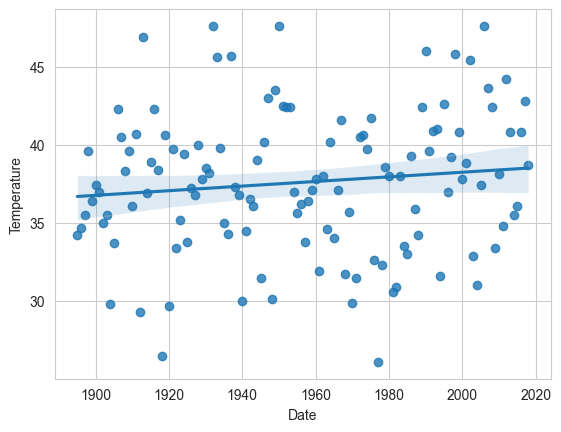

In [64]:
import seaborn as sns 

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y = nyc.Temperature)

## Part 2 

## Loading Data 

In [65]:
import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

nyc.columns= ['Date', 'Temperature', 'Anomaly']

nyc.Date = nyc.Date.floordiv(100)

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Splitting the data 



In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1,1), nyc.Temperature.values,random_state=11)

X_train.shape



(93, 1)

In [67]:
X_test.shape

(31, 1)

## Training the model

In [68]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [69]:
linear_regression.coef_

array([0.01939167])

In [70]:
linear_regression.intercept_

-0.30779820252658396

## Testing the model 

In [71]:
predicted = linear_regression.predict(X_test )

expected = y_test

for p,e, in zip(predicted[::5], expected[::5]):
    print(f"predicted: {p:.2f}, expected{e:.2f}")

predicted: 37.86, expected31.70
predicted: 38.69, expected34.80
predicted: 37.00, expected39.40
predicted: 37.25, expected45.70
predicted: 38.05, expected32.30
predicted: 37.64, expected33.80
predicted: 36.94, expected39.70


## Predicting Future Temps

In [72]:
predict = (lambda x: linear_regression.coef_* x + linear_regression.intercept_)

predict(2026)

array([38.97973189])

## Visualizeing the data 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


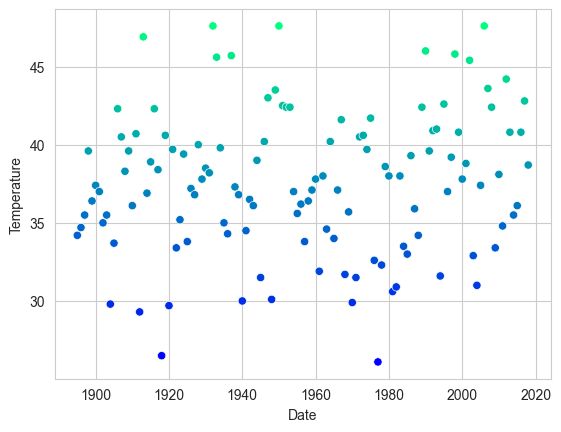

In [73]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x = 'Date', y = 'Temperature', hue='Temperature',palette='winter', legend=False)





In [74]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [75]:
import numpy as np
x=np.array([min(nyc.Date.values), max(nyc.Date.values)])


In [76]:
y = predict(x)

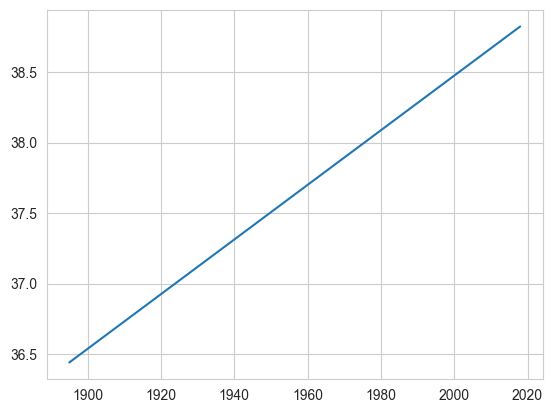

In [77]:
import matplotlib.pyplot as plt

line = plt.plot(x,y)